<a href="https://colab.research.google.com/github/GusdPaula/stock_market_prediction/blob/main/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import pandas as pd

In [2]:
sp500 = yf.Ticker("^GSPC")

In [4]:
sp500 = sp500.history(period='max')

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-09 00:00:00-05:00,4391.410156,4393.399902,4343.939941,4347.350098,3900780000,0.0,0.0
2023-11-10 00:00:00-05:00,4364.149902,4418.029785,4353.339844,4415.240234,3665080000,0.0,0.0
2023-11-13 00:00:00-05:00,4406.660156,4421.759766,4393.819824,4411.549805,3326240000,0.0,0.0


In [6]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-11-02 00:00:00-04:00', '2023-11-03 00:00:00-04:00',
               '2023-11-06 00:00:00-05:00', '2023-11-07 00:00:00-05:00',
               '2023-11-08 00:00:00-05:00', '2023-11-09 00:00:00-05:00',
               '2023-11-10 00:00:00-05:00', '2023-11-13 00:00:00-05:00',
               '2023-11-14 00:00:00-05:00', '2023-11-15 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24085, freq=None)

<Axes: xlabel='Date'>

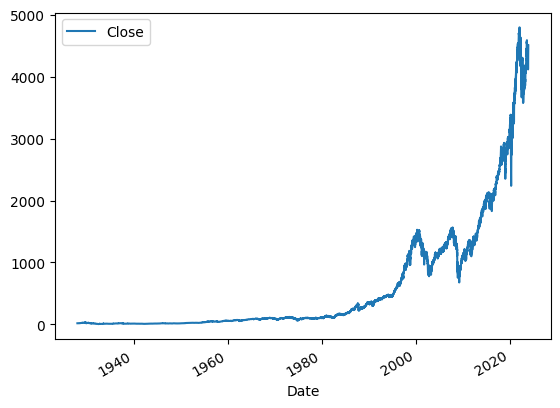

In [8]:
sp500.plot.line(y='Close', use_index=True)

In [9]:
del sp500['Dividends']
del sp500['Stock Splits']

In [10]:
sp500['Tomorow'] = sp500['Close'].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-11-09 00:00:00-05:00,4391.410156,4393.399902,4343.939941,4347.350098,3900780000,4415.240234
2023-11-10 00:00:00-05:00,4364.149902,4418.029785,4353.339844,4415.240234,3665080000,4411.549805
2023-11-13 00:00:00-05:00,4406.660156,4421.759766,4393.819824,4411.549805,3326240000,4495.700195


In [15]:
sp500['Target'] = (sp500['Tomorow'] > sp500['Close']).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-11-09 00:00:00-05:00,4391.410156,4393.399902,4343.939941,4347.350098,3900780000,4415.240234,1
2023-11-10 00:00:00-05:00,4364.149902,4418.029785,4353.339844,4415.240234,3665080000,4411.549805,0
2023-11-13 00:00:00-05:00,4406.660156,4421.759766,4393.819824,4411.549805,3326240000,4495.700195,1


In [16]:
sp500 = sp500.loc["1990-01-01":].copy()

In [17]:
sp500

,Open,High,Low,Close,Volume,Tomorow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-11-09 00:00:00-05:00,4391.410156,4393.399902,4343.939941,4347.350098,3900780000,4415.240234,1
2023-11-10 00:00:00-05:00,4364.149902,4418.029785,4353.339844,4415.240234,3665080000,4411.549805,0
2023-11-13 00:00:00-05:00,4406.660156,4421.759766,4393.819824,4411.549805,3326240000,4495.700195,1


In [19]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [20]:
train = sp500.iloc[:-100]
test = sp500[-100:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [21]:
preds = model.predict(test[predictors])
preds

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [24]:
preds = pd.Series(preds, index=test.index)

In [25]:
preds

Date
2023-06-27 00:00:00-04:00    1
2023-06-28 00:00:00-04:00    1
2023-06-29 00:00:00-04:00    1
2023-06-30 00:00:00-04:00    1
2023-07-03 00:00:00-04:00    0
                            ..
2023-11-09 00:00:00-05:00    1
2023-11-10 00:00:00-05:00    1
2023-11-13 00:00:00-05:00    0
2023-11-14 00:00:00-05:00    1
2023-11-15 00:00:00-05:00    1
Length: 100, dtype: int64

In [26]:
precision_score(test['Target'], preds)

0.4931506849315068

<Axes: xlabel='Date'>

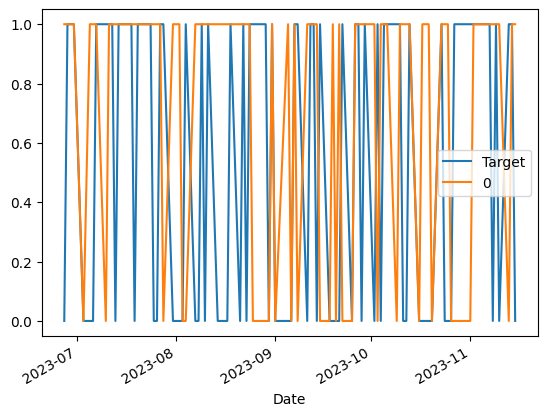

In [28]:
combined = pd.concat([test['Target'], preds], axis=1)
combined.plot()

In [41]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test['Target'], preds], axis=1)

    return combined

In [42]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [43]:
predictions = backtest(sp500, model, predictors)

In [44]:
predictions['Predictions'].value_counts()

0    3448
1    2587
Name: Predictions, dtype: int64

In [45]:
predictions

,Target,Predictions
Date,,
1999-11-22 00:00:00-05:00,0,0
1999-11-23 00:00:00-05:00,1,0
1999-11-24 00:00:00-05:00,0,0
1999-11-26 00:00:00-05:00,0,0
1999-11-29 00:00:00-05:00,0,0
...,...,...
2023-11-09 00:00:00-05:00,1,1
2023-11-10 00:00:00-05:00,0,1
2023-11-13 00:00:00-05:00,1,0


In [46]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5280247390800155

In [48]:
predictions['Target'].value_counts() / predictions.shape[0]

1    0.53372
0    0.46628
Name: Target, dtype: float64

In [49]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_avarages = sp500.rolling(horizon).mean()

    ratio_column = f'Close_Ratio_{horizon}'
    sp500[ratio_column] = sp500['Close'] / rolling_avarages['Close']

    trend_column = f'Trend_{horizon}'
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target']

    new_predictors += [ratio_column, trend_column]

In [50]:
sp500

,Open,High,Low,Close,Volume,Tomorow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-09 00:00:00-05:00,4391.410156,4393.399902,4343.939941,4347.350098,3900780000,4415.240234,1,0.995942,1.0,0.995599,4.0,0.998641,31.0,1.037118,126.0,1.108368,527.0
2023-11-10 00:00:00-05:00,4364.149902,4418.029785,4353.339844,4415.240234,3665080000,4411.549805,0,1.007748,1.0,1.008519,4.0,1.014062,32.0,1.052890,126.0,1.125302,528.0
2023-11-13 00:00:00-05:00,4406.660156,4421.759766,4393.819824,4411.549805,3326240000,4495.700195,1,0.999582,1.0,1.005582,3.0,1.013052,32.0,1.051554,126.0,1.123986,528.0


In [51]:
sp500 = sp500.dropna()

In [52]:
sp500

,Open,High,Low,Close,Volume,Tomorow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08 00:00:00-05:00,4384.370117,4391.200195,4359.759766,4382.779785,3729510000,4347.350098,0,1.000502,2.0,1.005074,5.0,1.006560,31.0,1.045961,127.0,1.117750,527.0
2023-11-09 00:00:00-05:00,4391.410156,4393.399902,4343.939941,4347.350098,3900780000,4415.240234,1,0.995942,1.0,0.995599,4.0,0.998641,31.0,1.037118,126.0,1.108368,527.0
2023-11-10 00:00:00-05:00,4364.149902,4418.029785,4353.339844,4415.240234,3665080000,4411.549805,0,1.007748,1.0,1.008519,4.0,1.014062,32.0,1.052890,126.0,1.125302,528.0


In [54]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [55]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test['Target'], preds], axis=1)

    return combined

In [56]:
predictions = backtest(sp500, model, new_predictors)

In [57]:
predictions['Predictions'].value_counts()

0.0    4209
1.0     825
Name: Predictions, dtype: int64

In [58]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5709090909090909